Exercícios com transformada de Hough
===
---

Use este link para carregar os exercícios sobre transformada de [Hough](https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html) baseado no tutorial da OpenCV.

Use a imagem do cartão de crédito disponível no repositório de imagens do curso para encontrar as retas que definem as bordas do cartão. Com base nos parâmetros encontrados, rotacione e translade a imagem do cartão para a origem da imagem.

Realize o recorte da imagem, gerando uma imagem somente com o cartão visível.

Mostre passo a passo o processo e explique as funções utilizadas para as transformações geométrica de rotação e translação.

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

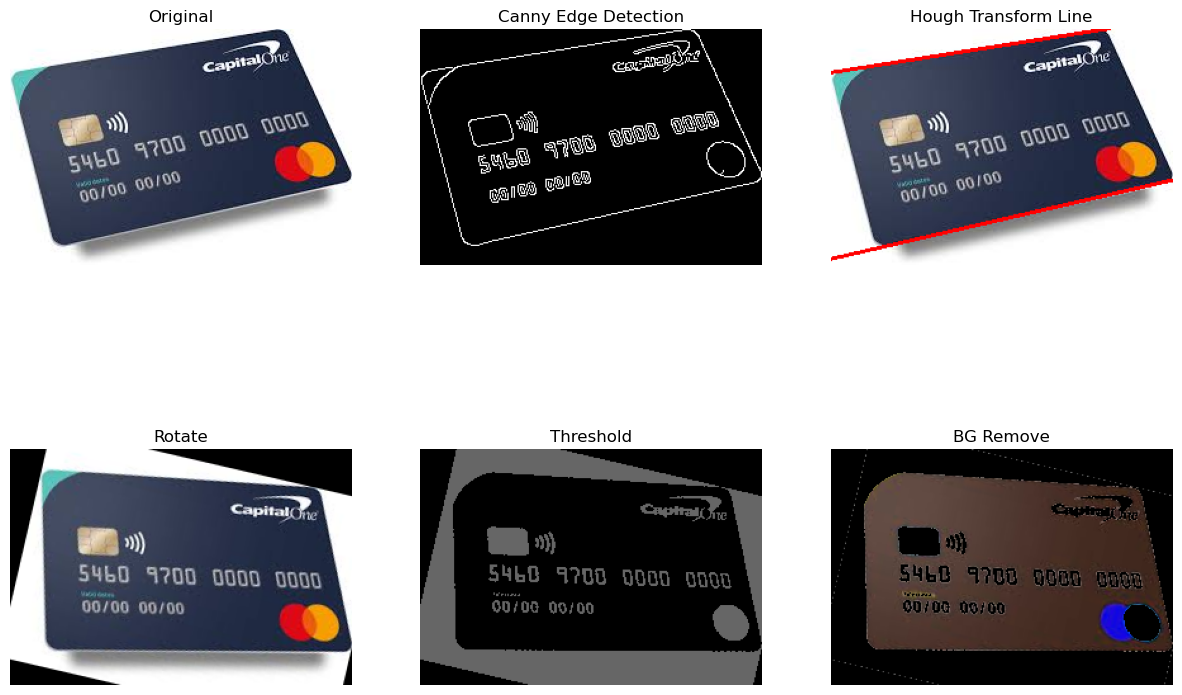

In [40]:
#Carregando a imagem
img = cv.imread('cartao1.jpg')
img_lines = np.copy(img)

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,200,500,apertureSize = 3)
lines = cv.HoughLines(edges,1,np.pi/180,100)

#Desenhando as linhas na imagem
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(img_lines,(x1,y1),(x2,y2),(0,0,255),2)

#Obtenção do angulo de rotação
angle = 360 - (90 - theta*(180/np.pi))
#Rotacionando a imagem
rotate = cv.getRotationMatrix2D((img.shape[0]/2,img.shape[1]/2),angle,1)
img_rotate = cv.warpAffine(img, rotate, dsize=(img.shape[1],img.shape[0])).astype(np.uint8)

#Removendo o fundo da imagem
gray_rotate = cv.cvtColor(img_rotate,cv.COLOR_BGR2GRAY).astype(np.uint8)
ret,thresh = cv.threshold(gray_rotate,
                           int(img_rotate[:, :, 0].mean()),
                           int(img_rotate[:, :, 1].mean()),
                           0)

contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
mask = np.zeros(shape=(gray.shape), dtype=np.uint8)
cv.drawContours(mask, contours, -1, (1,0,0), cv.FILLED)   
mask = (~(mask == 1) * 1).astype(np.uint8)
img_masked = cv.bitwise_and(img_rotate, img_rotate, mask=mask)

#Exibição dos resultados
plt.figure(figsize=(15,10))
plt.subplot(231), plt.title("Original"), plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), plt.axis('off')
plt.subplot(232), plt.title("Canny Edge Detection"), plt.imshow(edges, 'gray'), plt.axis('off')
plt.subplot(233), plt.title("Hough Transform Line"), plt.imshow(cv.cvtColor(img_lines,cv.COLOR_BGR2RGB)), plt.axis('off')
plt.subplot(234), plt.title("Rotate"), plt.imshow(cv.cvtColor(img_rotate,cv.COLOR_BGR2RGB)), plt.axis('off')
plt.subplot(235), plt.title("Threshold"), plt.imshow(cv.cvtColor(thresh,cv.COLOR_BGR2RGB)), plt.axis('off')
plt.subplot(236), plt.title("BG Remove"), plt.imshow(img_masked), plt.axis('off')
plt.show()